In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [98]:
#!unzip '/content/train.zip'
#!unzip '/content/test1.zip'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
from PIL import Image
import cv2
from tqdm import tqdm
from sklearn.preprocessing import LabelBinarizer

In [ ]:
train_data_path = '/content/train'
train_image_path = glob(train_data_path + '/*.jpg')

In [ ]:
names = []
labels = []

for path in train_image_path:
  name= path.split('/content/train/')[1]
  names.append(name)
  labels.append(name.split('.')[0])

In [ ]:
train_dataset = {"path":train_image_path,"name":names,"label":labels}   #{'path': ['/content/train/dog.2200.jpg', '/content/train/dog.7226.jpg', '/content/train/dog.11782.jpg',...
df_train_dataset = pd.DataFrame(train_dataset)
df_train_dataset.head(10)

,path,name,label
0,/content/train/cat.3780.jpg,cat.3780.jpg,cat
1,/content/train/cat.11677.jpg,cat.11677.jpg,cat
2,/content/train/dog.2159.jpg,dog.2159.jpg,dog
3,/content/train/dog.8164.jpg,dog.8164.jpg,dog
4,/content/train/cat.12279.jpg,cat.12279.jpg,cat
5,/content/train/cat.5685.jpg,cat.5685.jpg,cat
6,/content/train/cat.8308.jpg,cat.8308.jpg,cat
7,/content/train/cat.9393.jpg,cat.9393.jpg,cat
8,/content/train/dog.8578.jpg,dog.8578.jpg,dog
9,/content/train/dog.5932.jpg,dog.5932.jpg,dog


In [77]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(100,100,3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation="relu"),
        #tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(2, activation = "softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 10, 10, 64)      

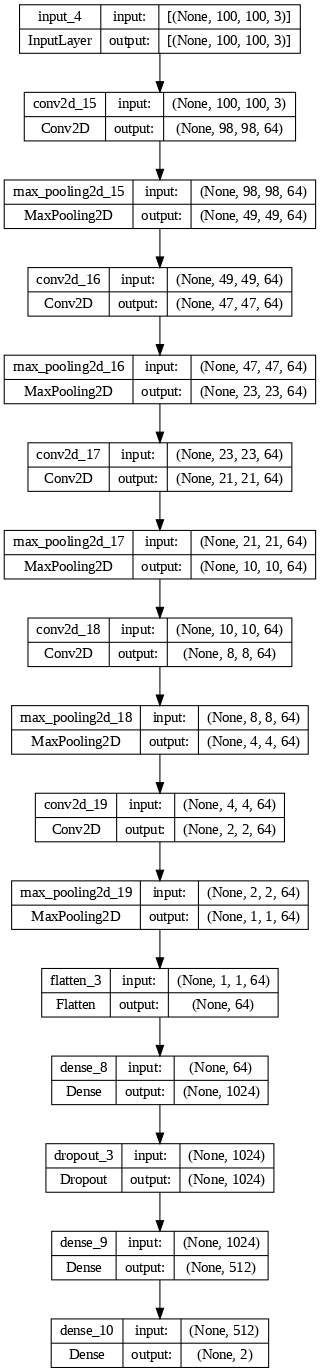

In [78]:
tf.keras.utils.plot_model(model=model,show_shapes=True,dpi=76)

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [80]:
train_data_generator = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255,
                                          )

train_generator = train_data_generator.flow_from_dataframe(
    df_train_dataset[0:20000],
    '/content/train',
    x_col = "name",
    y_col = "label",
    target_size = (100,100),
    class_mode = "categorical",
    batch_size = 128


)

Found 20000 validated image filenames belonging to 2 classes.


In [82]:
validation_data_generator = ImageDataGenerator(
    rescale=1./255,
                                          )

validation_generator = validation_data_generator.flow_from_dataframe(
    df_train_dataset[20000:25000],
    '/content/train',
    x_col = "name",
    y_col = "label",
    target_size = (100,100),
    class_mode = "categorical",
    batch_size = 64


)

Found 5000 validated image filenames belonging to 2 classes.


In [83]:
epoch = 10
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [84]:
history = model.fit(train_generator, epochs=epoch, steps_per_epoch= 20000/128, validation_data = validation_generator, validation_steps=5000/64 )

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
156/156 [==============================] - 86s 533ms/step - loss: 0.6863 - accuracy: 0.5416 - val_loss: 0.6588 - val_accuracy: 0.6170
Epoch 2/10
156/156 [==============================] - 83s 532ms/step - loss: 0.6323 - accuracy: 0.6344 - val_loss: 0.5826 - val_accuracy: 0.7004
Epoch 3/10
156/156 [==============================] - 83s 528ms/step - loss: 0.5755 - accuracy: 0.7024 - val_loss: 0.4765 - val_accuracy: 0.7704
Epoch 4/10
156/156 [==============================] - 83s 527ms/step - loss: 0.5214 - accuracy: 0.7438 - val_loss: 0.4665 - val_accuracy: 0.7826
Epoch 5/10
156/156 [==============================] - 82s 524ms/step - loss: 0.4893 - accuracy: 0.7638 - val_loss: 0.4019 - val_accuracy: 0.8142
Epoch 6/10
156/156 [==============================] - 81s 520ms/step - loss: 0.4489 - accuracy: 0.7892 - val_loss: 0.3804 - val_accuracy: 0.8182
Epoch 7/10
156/156 [==============================] - 85s 547ms/step - loss: 0.4278 - accuracy: 0.8013 - val_loss: 0.3767 - val_ac

In [86]:
def plot_graphs(fitted_model, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

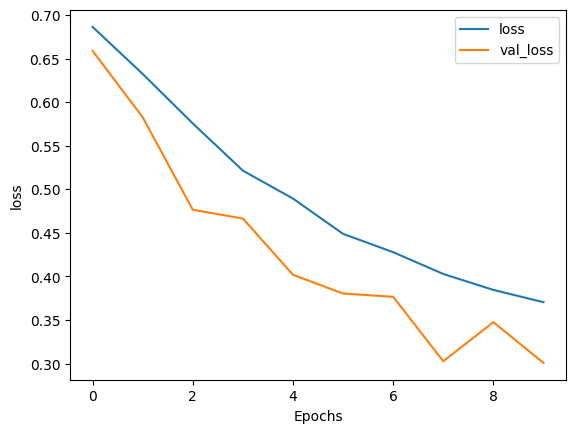

In [87]:
plot_graphs(fitted_model=history, metric='loss')

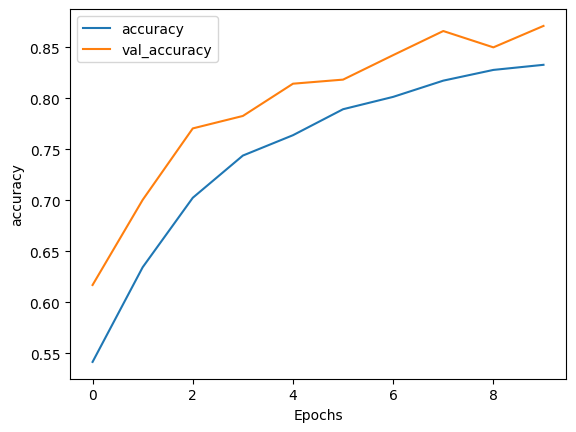

In [88]:
plot_graphs(fitted_model = history, metric = 'accuracy')

Prediction x_test (no evaluation)

In [89]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = './saved_model'
save_model(model, filepath)

# Load the model
model = load_model(filepath, compile = True)

In [90]:
test_data_path = '/content/test1'
test_image_path = glob(test_data_path + '/*.jpg')

In [91]:
names = []

for path in test_image_path:
  name= path.split('/content/test1/')[1]
  names.append(name)

In [92]:
test_dataset = {"path":test_image_path, "name":names}
df_test_dataset = pd.DataFrame(test_dataset)
df_test_dataset.head(5)

,path,name
0,/content/test1/11903.jpg,11903.jpg
1,/content/test1/10052.jpg,10052.jpg
2,/content/test1/8818.jpg,8818.jpg
3,/content/test1/1621.jpg,1621.jpg
4,/content/test1/6994.jpg,6994.jpg


In [93]:
test_data_generator = ImageDataGenerator(
    rescale=1./255,
                                          )

test_generator = test_data_generator.flow_from_dataframe(
    df_test_dataset,
    '/content/test1',
    x_col = "name",
    y_col = None,
    target_size = (100,100),
    class_mode = None,
    batch_size = 128,
    shuffle = False

)

Found 12500 validated image filenames.


In [94]:
predicted_result = model.predict_generator(test_generator, steps = 12500/128)

<ipython-input-94-9e0ab698fe57>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_result = model.predict_generator(test_generator, steps = 12500/128)


In [95]:
print(predicted_result[0])

[0.971924   0.02807604]


In [96]:
def class_title(predicted_result, example):
  selected_class = np.argmax(predicted_result[example])
  if selected_class == 0:
    selected_class = "cat"
  else:
    selected_class = "dog"
  return selected_class

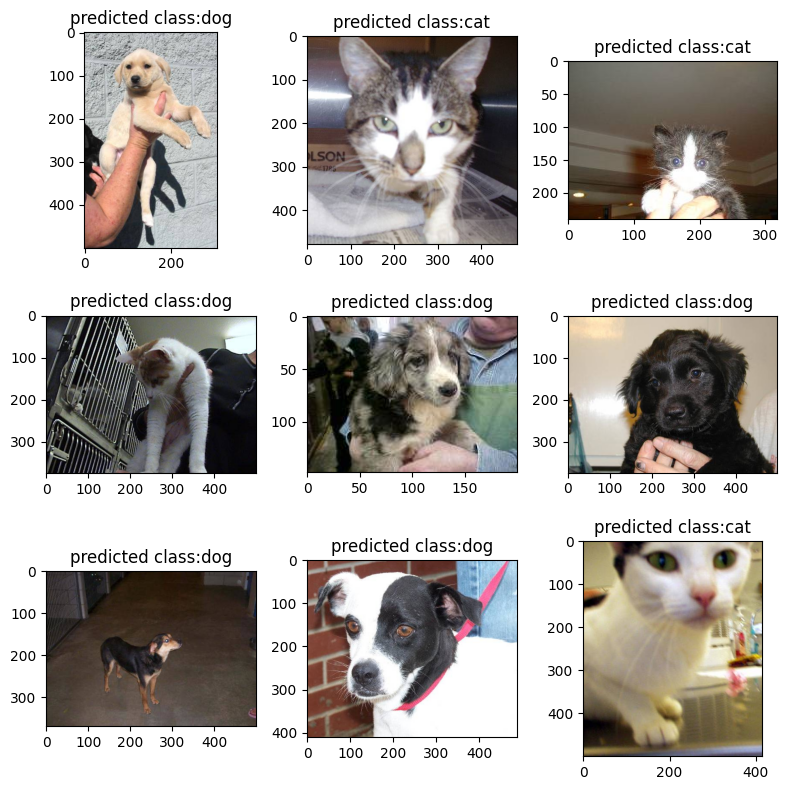

In [97]:
plt.figure(figsize=(8, 8))

for i in range(40,49):
  plt.subplot(3,3,i+1-40)
  plt.imshow(Image.open(test_image_path[i]))
  plt.title("predicted class:{}".format(class_title(predicted_result, i)))

plt.tight_layout()